In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data  import DataLoader

from torch.autograd import Variable

In [3]:
# 네트워크에 들어갈 이미지 크기
# 네트워크에는 동일한 크기의 이미지만 넣을 수 있음
# GPU 병렬처리 때문
imgsize = 128

In [5]:
#폴더이름
img_dir = "/content/gdrive/MyDrive/my_catdog/train/"

# 해당 폴더를 train 데이터로 지정 
my_train = dset.ImageFolder(img_dir, transforms.Compose([transforms.Resize((imgsize, imgsize)), transforms.ToTensor()]))
#my_train 개수 출력
print(my_train.__len__())

10


In [6]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)
print("클래스 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", my_train.__len__())

# of classes(클래스 개수): 2
클래스 이름: ['cats', 'dogs']
클래스별 인덱스: {'cats': 0, 'dogs': 1}
my_train 개수: 10


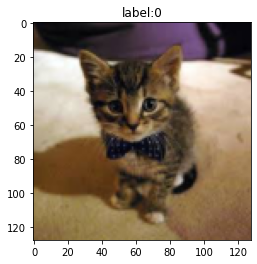

(128, 128, 3)


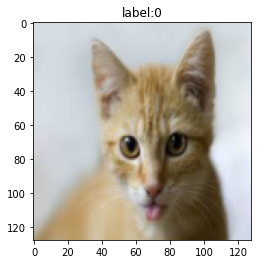

(128, 128, 3)


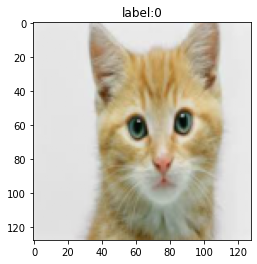

(128, 128, 3)


In [7]:
for i in range(3):
    img = my_train[i][0].numpy()
    img = np.transpose(img, (1,2,0))

    plt.title("label:%d" %my_train[i][1])
    plt.imshow(img)
    plt.show()

    print(img.shape)

In [9]:
batch_size = 3
train_loader = data.DataLoader(my_train, batch_size = batch_size, shuffle = False, num_workers = 2, drop_last = True)

[0]
한 번에 로드되는 데이터 크기: 3


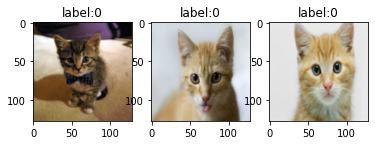

[1]
한 번에 로드되는 데이터 크기: 3


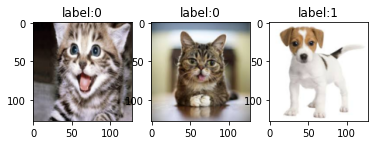

[2]
한 번에 로드되는 데이터 크기: 3


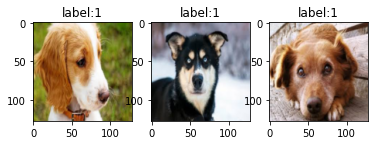

In [10]:
n = 3
for i, [imgs,labels] in enumerate(train_loader):
    if i > 5:
        break

    print ("[%d]" %i)
    print("한 번에 로드되는 데이터 크기:", len(imgs))

    x = Variable(imgs)
    y = Variable(labels)

    for j in range(n):
        img = imgs[j].numpy()
        img = np.transpose(img,(1,2,0))

        plt.subplot(1, n, j + 1)
        plt.imshow(img)
        plt.title("label:%d" %labels[j])
    plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data  import Dataset, DataLoader

from torch.autograd import Variable

from PIL import Image

In [20]:
imgsize = 128
img_dir = "/content/gdrive/MyDrive/my_catdog/train/"

In [11]:
import os

def MyGetInfoFromFolder(ipath):
    classes = sorted(os.listdir(ipath))
    class_to_idx = {}
    length = 0
    total_file_list = []
    total_label = []

    for i, c in enumerate(classes):
        class_to_idx.update({c : i})

        file_list = sorted(os.listdir(ipath + "/" + c))
        length += len(file_list)

        for f in file_list:
            total_file_list.append(ipath + c + "/" + f)
            total_label.append(i)

    return classes, class_to_idx, length, total_file_list, total_label

In [12]:
classes, class_to_idx, length, total_file_list, total_label = MyGetInfoFromFolder(img_dir)
print(classes)
print(class_to_idx)
print(length)
print(total_label[0])
print(total_file_list[0])

['cats', 'dogs']
{'cats': 0, 'dogs': 1}
10
0
/content/gdrive/MyDrive/my_catdog/train/cats/images (2).jpeg


In [26]:
class MyImageFolder(Dataset):
    def __init__(self, ipath, transform = transforms.ToTensor()):
        self.classes, self.class_to_idx, self.length, self.file_list, self.labels = MyGetInfoFromFolder(ipath)

        self.root_dir = ipath
        self.transform = transform

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        img = Image.open(self.file_list[idx])

        if(img.mode != "RGB"):
            img = img.convert(mode = "RGB")

        img = self.transform(img)

        label = self.labels[idx]

        return img, label

In [27]:
my_train = MyImageFolder(img_dir, transforms.Compose([transforms.Resize((imgsize, imgsize)), transforms.ToTensor()]))

In [28]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)
print("클래스 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", my_train.__len__())

# of classes(클래스 개수): 2
클래스 이름: ['cats', 'dogs']
클래스별 인덱스: {'cats': 0, 'dogs': 1}
my_train 개수: 10


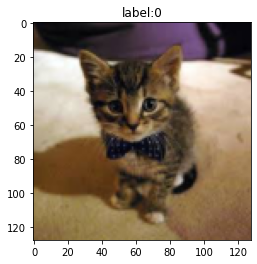

torch.Size([128, 128, 3])


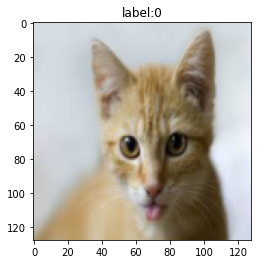

torch.Size([128, 128, 3])


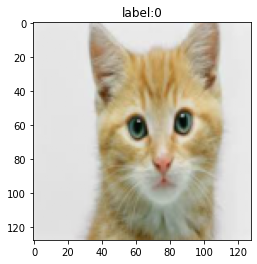

torch.Size([128, 128, 3])


In [30]:
for i in range(3):
    img = my_train[i][0]
    img = np.transpose(img,(1,2,0))

    plt.title("label:%d" %my_train[i][1])
    plt.imshow(img)
    plt.show()

    print(img.shape)

In [31]:
batch_size = 3
train_loader = data.DataLoader(my_train, batch_size = batch_size, shuffle = False, num_workers = 2, drop_last = True)

[0]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


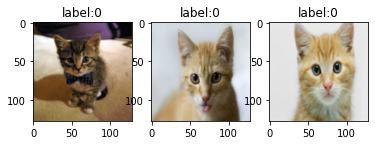

[1]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


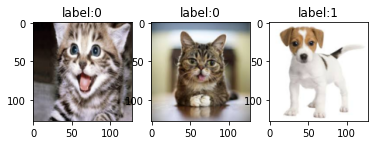

[2]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


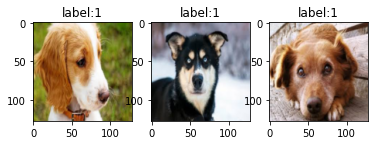

In [32]:
n = 3
for i, [imgs,labels] in enumerate(train_loader):
    if i > 5:
        break

    print ("[%d]" %i)
    print("한 번에 로드되는 데이터 크기:", len(imgs))

    x = Variable(imgs)
    y = Variable(labels)

    print(x.shape)
    print(y.shape)

    for j in range(n):
        img = imgs[j].numpy()
        img = np.transpose(img,(1,2,0))

        plt.subplot(1, n, j + 1)
        plt.imshow(img)
        plt.title("label:%d" %labels[j])
    plt.show()

In [33]:
def CropImgSquare(img):
    small_len = min(img.width, img.height)
    cx, cy = img.width/2, img.height/2
    d = small_len/2
    (left, upper, right, lower) = (cx-d, cy-d, cx+d, cy+d)
    img = img.crop((left, upper, right, lower))

    return img

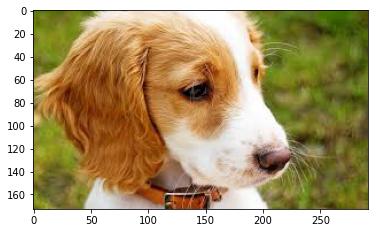

292 173


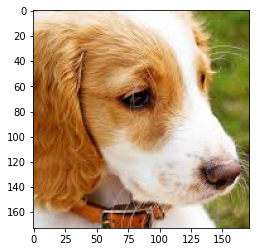

172 173


In [35]:
dir = img_dir + "dogs/images (2).jpeg"
img = Image.open(dir)
plt.imshow(img)
plt.show()

print(img.width, img.height)

img = CropImgSquare(img)

plt.imshow(img)
plt.show()

print(img.width, img.height)

In [36]:
class MyImageFolder(Dataset):
    def __init__(self,ipath, transform=transforms.ToTensor()):
        self.classes, self.class_to_idx, self.length, self.file_list, self.labels = MyGetInfoFromFolder(ipath)

        self.root_dir = ipath
        self.transform  = transform

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        img = Image.open(self.file_list[idx])

        if(img.mode != "RGB"):
            img = img.convert(mode="RGB")

        img = CropImgSquare(img)
        img = self.transform(img)

        label = self.labels[idx]

        return img, label       

In [37]:
my_train = MyImageFolder(img_dir, transforms.Compose([transforms.Resize((imgsize, imgsize)), transforms.ToTensor()]))

In [38]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)
print("클래스 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", my_train.__len__())

# of classes(클래스 개수): 2
클래스 이름: ['cats', 'dogs']
클래스별 인덱스: {'cats': 0, 'dogs': 1}
my_train 개수: 10


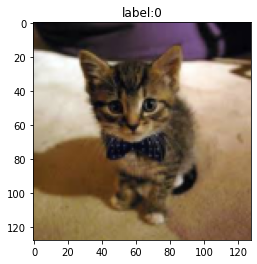

torch.Size([128, 128, 3])


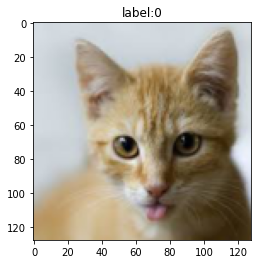

torch.Size([128, 128, 3])


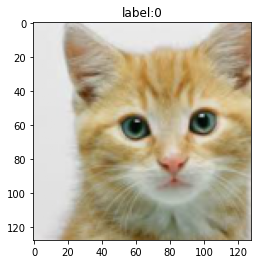

torch.Size([128, 128, 3])


In [39]:
for i in range(3):
    img = my_train[i][0]
    img = np.transpose(img,(1,2,0))

    plt.title("label:%d" %my_train[i][1])
    plt.imshow(img)
    plt.show()

    print(img.shape)